In [68]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [70]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


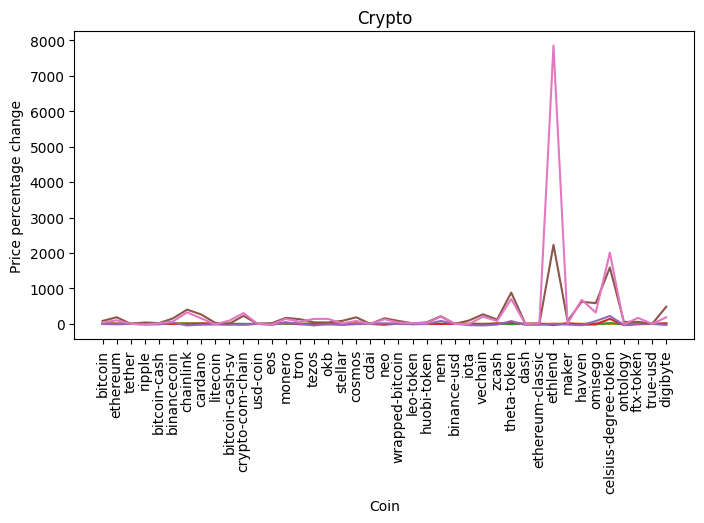

In [71]:
# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8, 4))
plt.plot(df_market_data.index, df_market_data.values)
plt.xticks(rotation=90)
plt.ylabel('Price percentage change')
plt.xlabel('Coin')
plt.title('Crypto')

# Show the plot
plt.show()

---

### Prepare the Data

In [72]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Select the columns to normalize
columns_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d',
                        'price_change_percentage_14d', 'price_change_percentage_30d',
                        'price_change_percentage_60d', 'price_change_percentage_200d',
                        'price_change_percentage_1y']

# Create a new DataFrame for normalized data
df_normalized = df_market_data.copy()

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Normalize the selected columns
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

df_normalized.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [73]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 12))

In [74]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)

    # 2. Fit the model to the data
    kmeans_model.fit(df_normalized)

    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [75]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': list(range(1, 12)), 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

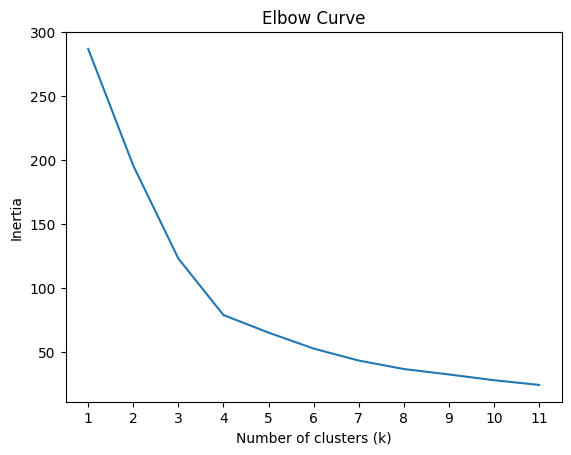

In [76]:
# Plot the Elbow curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.xticks(df_elbow['k'])
plt.show()


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [77]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4)


In [78]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [79]:
# Predict the clusters
cluster_labels = kmeans_model.predict(df_normalized)

# Print the resulting array of cluster values
print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [80]:
# Create a copy of the DataFrame
df2_normalized = df_normalized

df2_normalized.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
okb,-0.923203,-1.437359,-0.629963,-0.460558,-0.058504,-0.457283,-0.166900
neo,0.286546,-0.326301,-1.212670,-0.903134,0.290970,-0.181187,-0.175550
cosmos,-0.255978,1.840274,0.643565,0.116538,-0.151913,-0.117565,-0.215191
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747


In [81]:
# Add a new column to the DataFrame with the predicted clusters
df2_normalized['Cluster'] = cluster_labels

# Display sample data
df2_normalized.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2
bitcoin-cash-sv,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029,0
wrapped-bitcoin,0.515453,0.461843,0.769975,0.224045,-0.074674,-0.355054,-0.251623,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232,0
monero,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644,2
zcash,-0.127467,0.929119,0.677532,0.223834,-0.437068,-0.265163,-0.214829,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0


<ipython-input-82-da7ec9c0fb0b>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(cluster_labels.unique()))(cluster_labels)


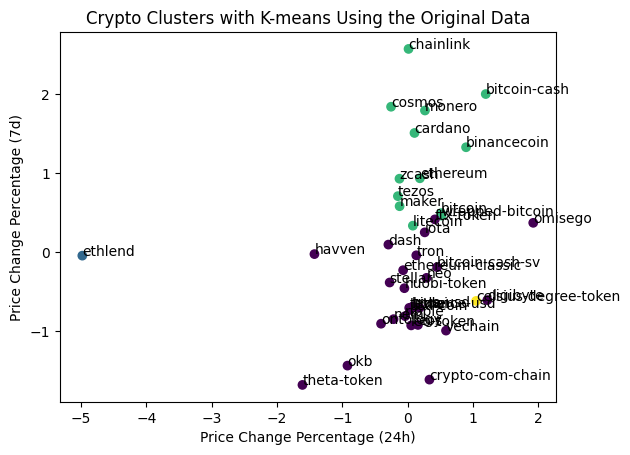

In [82]:
# Set the x and y variables
x = df2_normalized["price_change_percentage_24h"]
y = df2_normalized["price_change_percentage_7d"]

# Set the color of the graph points based on the cluster labels
cluster_labels = df2_normalized["Cluster"]
colors = plt.cm.get_cmap('viridis', len(cluster_labels.unique()))(cluster_labels)

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Add the crypto name as index annotations
for i, name in enumerate(df2_normalized.index):
    plt.annotate(name, (x[i], y[i]))

# Set the labels and title
plt.xlabel("Price Change Percentage (24h)")
plt.ylabel("Price Change Percentage (7d)")
plt.title("Crypto Clusters with K-means Using the Original Data")

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [83]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)


In [84]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_pca = pca.fit_transform(df_normalized)
# View the first five rows of the DataFrame.
market_pca[:5]

array([[ 1.19408229, -0.90207402, -0.58533763],
       [ 1.00970605, -0.66358438, -1.13695032],
       [-0.72253591, -0.30763241,  0.7218133 ],
       [-0.74826646, -0.33237895,  0.55847869],
       [ 2.25853853, -1.82696614, -1.37816649]])

In [85]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37269822, 0.32489961, 0.18917649])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** Approx.: 88.9%

In [86]:
# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(market_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
df_market_data_pca['crypto_names'] = df_market_data.index

# Set the coinid column as index
df_market_data_pca = df_market_data_pca.set_index('crypto_names')

# Display sample data
df_market_data_pca.head()


,PCA1,PCA2,PCA3
crypto_names,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166


---

### Find the Best Value for k Using the PCA Data

In [87]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [88]:
# Create an empy list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters = i, random_state = 0)
    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(df_market_data_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [89]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

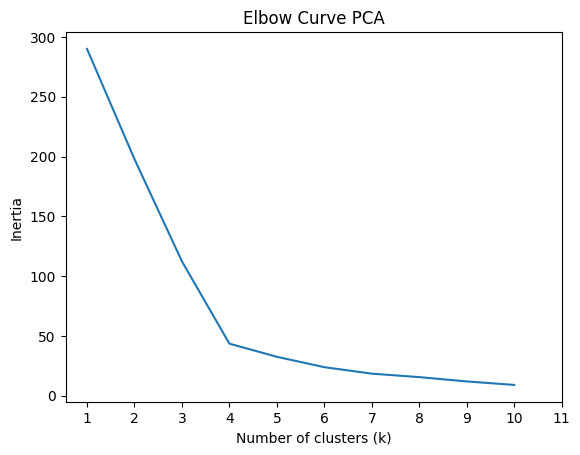

In [90]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'])
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve PCA')
plt.xticks(df_elbow['k'])
plt.show()


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [91]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters = 4)

In [92]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_market_data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [93]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters_pca = model_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [94]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_predictions = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_predictions['Cluster'] = crypto_clusters_pca

# Display sample data
df_market_pca_predictions.head()

,PCA1,PCA2,PCA3,Cluster
crypto_names,,,,
bitcoin,1.194082,-0.902074,-0.585338,0
ethereum,1.009706,-0.663584,-1.136950,0
tether,-0.722536,-0.307632,0.721813,1
ripple,-0.748266,-0.332379,0.558479,1
bitcoin-cash,2.258539,-1.826966,-1.378166,0


<ipython-input-95-857c0b76013f>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(cluster_labels.unique()))(cluster_labels)


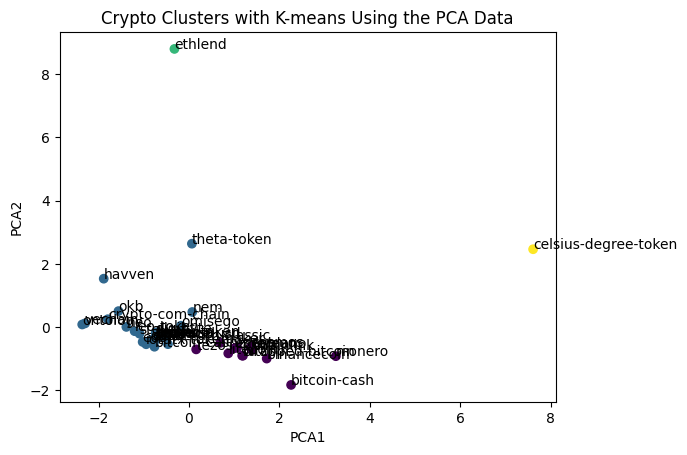

In [95]:
# Create a scatter plot

# Set the x and y variables
x = df_market_pca_predictions["PCA1"]
y = df_market_pca_predictions["PCA2"]

# Set the color of the graph points based on the cluster labels
cluster_labels = df_market_pca_predictions["Cluster"]
colors = plt.cm.get_cmap('viridis', len(cluster_labels.unique()))(cluster_labels)

# Create the scatter plot
plt.scatter(x, y, c=colors)

# Add the crypto name as index annotations
for i, name in enumerate(df_market_pca_predictions.index):
    plt.annotate(name, (x[i], y[i]))

# Set the labels and title
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Crypto Clusters with K-means Using the PCA Data")

# Show the plot
plt.show()


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

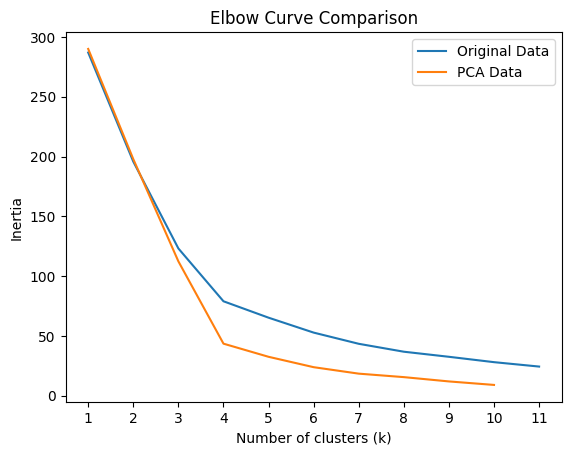

In [96]:
# Composite plot to contrast the Elbow curves
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the Elbow curve for the original data
ax.plot(df_elbow['k'], df_elbow['inertia'], label='Original Data')

# Plot the Elbow curve for the PCA data
ax.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], label='PCA Data')

# Set the labels and title
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Curve Comparison')
ax.set_xticks(df_elbow['k'])

# Add a legend
ax.legend()

# Display the plot
plt.show()

<ipython-input-97-e1886ddced7b>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_orig = plt.cm.get_cmap('viridis', len(cluster_labels_orig.unique()))(cluster_labels_orig)
<ipython-input-97-e1886ddced7b>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_pca = plt.cm.get_cmap('viridis', len(cluster_labels_pca.unique()))(cluster_labels_pca)


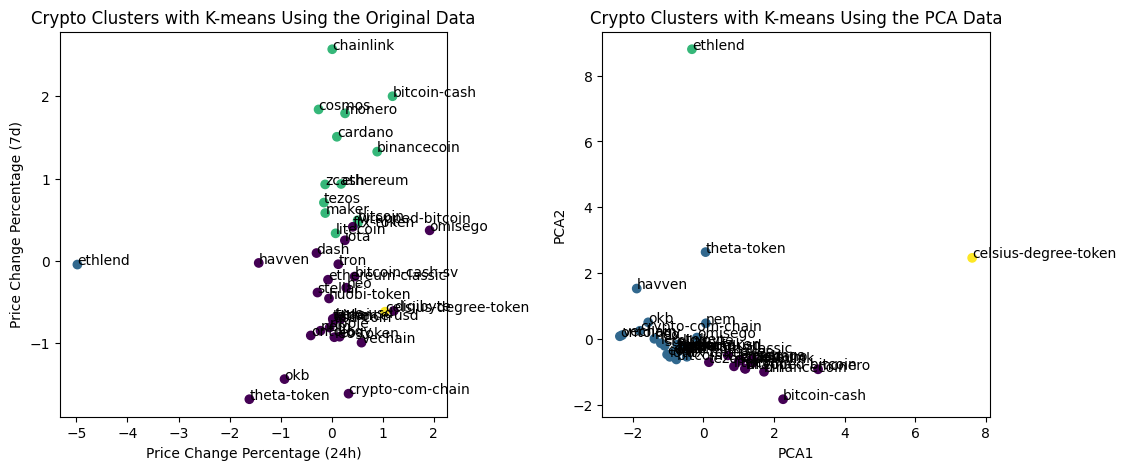

In [97]:
# Composite plot to contrast the clusters
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Set the x and y variables for the original data scatter plot
x_orig = df2_normalized["price_change_percentage_24h"]
y_orig = df2_normalized["price_change_percentage_7d"]
cluster_labels_orig = df2_normalized["Cluster"]
colors_orig = plt.cm.get_cmap('viridis', len(cluster_labels_orig.unique()))(cluster_labels_orig)

# Plot the original data scatter plot
ax1.scatter(x_orig, y_orig, c=colors_orig)
for i, name in enumerate(df2_normalized.index):
    ax1.annotate(name, (x_orig[i], y_orig[i]))
ax1.set_xlabel("Price Change Percentage (24h)")
ax1.set_ylabel("Price Change Percentage (7d)")
ax1.set_title("Crypto Clusters with K-means Using the Original Data")

# Set the x and y variables for the PCA data scatter plot
x_pca = df_market_pca_predictions["PCA1"]
y_pca = df_market_pca_predictions["PCA2"]
cluster_labels_pca = df_market_pca_predictions["Cluster"]
colors_pca = plt.cm.get_cmap('viridis', len(cluster_labels_pca.unique()))(cluster_labels_pca)

# Plot the PCA data scatter plot
ax2.scatter(x_pca, y_pca, c=colors_pca)
for i, name in enumerate(df_market_pca_predictions.index):
    ax2.annotate(name, (x_pca[i], y_pca[i]))
ax2.set_xlabel("PCA1")
ax2.set_ylabel("PCA2")
ax2.set_title("Crypto Clusters with K-means Using the PCA Data")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster data with K-means tends to reduce noise in the clusters and enhance the clarity and interpretability of the data grouping, but may result in information loss and altered cluster structure.